<a href="https://colab.research.google.com/github/gsasikiran/Semantic-similarity/blob/master/bert_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install bert-embedding
!apt-get install python-nltk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-nltk is already the newest version (3.2.5-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:

import scipy
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from bert_embedding import BertEmbedding
from matplotlib import cm as cm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
class BERT:
  
  def __init__(self, first_sentence, second_sentence):
    self.sentence_1 = first_sentence
    self.sentence_2 = second_sentence
    self.splitted_input_1 = word_tokenize(self.sentence_1)
    self.splitted_input_2 = word_tokenize(self.sentence_2)
    
  def get_embedding(self):
      embedding_1 = BertEmbedding().embedding(sentences = self.splitted_input_1)
      embedding_2 = BertEmbedding().embedding(sentences = self.splitted_input_2)
      return embedding_1, embedding_2
    
  def create_word_arrays(self, embedding):
    word_array = []
    for i in range(len(embedding)):
      word_array.append(embedding[i][1][0])
    return word_array

  def cosine_similarity_matrix(self, array_1, array_2):
    matrix = np.zeros((len(array_1), len(array_2)))
    for i in range(0, len(array_1)):
      for j in range(0, len(array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(array_1[i], array_2[j])
    return matrix.T
  
  def plot_similarity_matrix(self, word_array_1, word_array_2):
    # Code from https://kapilddatascience.wordpress.com/2016/05/29/plotting-similarity-score-in-a-matrix/
    x_labels = self.splitted_input_1
    y_labels = self.splitted_input_2
    
    hood_cosine_matrix = self.cosine_similarity_matrix(word_array_1,word_array_2)
    fig, ax = plt.subplots()
    cmap = cm.get_cmap('YlGnBu')
    cax = ax.matshow(hood_cosine_matrix, interpolation='nearest', cmap = cmap)
    ax.grid(True)
    plt.title('Similarity distance matrix(Bert embeddings)')
    plt.xticks(range(len(x_labels)), x_labels);
    print(len(x_labels))
    plt.yticks(range(len(y_labels)), y_labels);
    fig.colorbar(cax)
    plt.show()

Enter the first sentence A man cut a tomato
Enter the second sentence A woman cut a potato
(5, 5)
[[0.         0.23736441 0.34972    0.         0.26668119]
 [0.24340415 0.13809276 0.35501099 0.24340415 0.2974236 ]
 [0.34972    0.36103964 0.         0.34972    0.32728124]
 [0.         0.23736441 0.34972    0.         0.26668119]
 [0.26903605 0.25111568 0.39374584 0.26903605 0.16890973]]
5


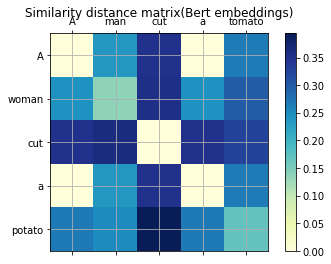

In [0]:
def main(first_input, second_input):
  bert_embedding = BERT(first_input, second_input)  
  first_embedding, second_embedding = bert_embedding.get_embedding()
  word_array_1, word_array_2 = bert_embedding.create_word_arrays(first_embedding), bert_embedding.create_word_arrays(second_embedding)  
  bert_embedding.plot_similarity_matrix(word_array_1, word_array_2)
  
if __name__ == '__main__':
  input_1 = input("Enter the first sentence ")
  input_2 = input("Enter the second sentence ")
  main(input_1, input_2) 